<a href="https://colab.research.google.com/github/MokshJaiswal/ML-Projects/blob/main/TDD_w_SplitData_changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thyroid Disease Detection

*Thyroid disease records supplied by the Garavan Institute and J. Ross
Quinlan, New South Wales Institute, Syndney, Australia,
1987. Then it was modified for unsupervised anomaly detection by Goldstein Markus et al. in 2015."*

This directory contains the latest version of an archive of thyroid diagnoses obtained from the Garvan Institute, consisting of 9172 records from 1984 to early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]
    
The attributes are given in order and separated by commas. Unknown attribute values are indicated by question marks.

![Image](https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/07/13/Pictures/thyroid_8d093330-868b-11e8-bbc3-e5c02a79570e.jpg)

### Reference
- [1] Goldstein M, Uchida S. A comparative evaluation of unsupervised anomaly detection algorithms for multivariate data[J]. PloS one, 2016, 11(4): e0152173.
- [2] Schiffmann W, Joost M, Werner R. Synthesis and performance analysis of multilayer neural network architectures[J]. 1992.
- [3] Goldstein, Markus, 2015, "annthyroid-unsupervised-ad.tab", Unsupervised Anomaly Detection Benchmark, https://doi.org/10.7910/DVN/OPQMVF/CJURKL, Harvard Dataverse, V1, UNF:6:jJUwpBJ4iBlQto8WT6zsUg== [fileUNF]

## Objective Statement:
This primary project aims to utilize machine learning to significantly improve the accuracy and efficiency
of thyroid disorder detection. By employing advanced algorithms and data analytics, the goal is to develop a robust
and reliable system capable of analyzing diverse medical data, including thyroid function tests and imaging results. The
key focus is on creating a machine learning-based solution that can assist healthcare professionals in early and
accurate identification of thyroid disorders, leading to timely interventions and improved patient outcomes.


#### Thyroid Detection Dataset Overview

The Thyroid Detection dataset, sourced from the UCI Machine Learning Repository and made available on Kaggle,
comprises 9172 observations with 31 attributes. The dataset is intended for the development and evaluation of
machine learning models to detect thyroid disorders. Each observation represents a patient, and the attributes include
demographic information, medical history, laboratory test results, and the target variable indicating the presence of
hyperthyroidism.

#### Key Attributes:
**1. Demographic Information:**
- *Age:* The age of the patient (integer).
- *Sex:* Gender identification of the patient (string).

**2. Medical History:**
- *On_thyroxine:* Boolean indicating whether the patient is on thyroxine.
- *Query_on_thyroxine:* Boolean indicating queries regarding thyroxine usage.
- *On_antithyroid_meds:* Boolean indicating whether the patient is on antithyroid medications.
- *Sick:* Boolean indicating whether the patient is sick.
- *Pregnant:* Boolean indicating whether the patient is pregnant.
- *Thyroid_surgery:* Boolean indicating whether the patient has undergone thyroid surgery.
- *I131_treatment:* Boolean indicating whether the patient is undergoing I131 treatment.
- *Query_hypothyroid:* Boolean indicating the patient's belief of having hypothyroidism.
- *Lithium:* Boolean indicating whether the patient uses lithium.
- *Goitre:* Boolean indicating whether the patient has goitre.
- *Tumor:* Boolean indicating whether the patient has a tumor.
- *Hypopituitary:* Float value indicating a condition related to the hyperpituitary gland.
- *Psych:* Boolean indicating a psychological condition.

**3. Laboratory Test Results:**
- *TSH_measured:* Boolean indicating whether TSH was measured.
- *TSH:* Float value representing the TSH level in the blood.
- *T3_measured:* Boolean indicating whether T3 was measured.
- *T3:* Float value representing the T3 level in the blood.
- *TT4_measured:* Boolean indicating whether TT4 was measured.
- *TT4:* Float value representing the TT4 level in the blood.
- *T4U_measured:* Boolean indicating whether T4U was measured.
- *T4U:* Float value representing the T4U level in the blood.
- *FTI_measured:* Boolean indicating whether FTI was measured.
- *FTI:* Float value representing the FTI level in the blood.
- *TBG_measured:* Boolean indicating whether TBG was measured.
- *TBG:* Float value representing the TBG level in the blood.

**4. Other Attributes:**
- *Referral_source:* String indicating the source of patient referral.
- *Target:* String indicating the medical diagnosis of hyperthyroidism.
- *Patient_id:* String representing a unique identifier for each patient.

#### Objective of Thyroid Detection:
The primary goal of thyroid detection using this dataset is to develop machine learning models capable of accurately
identifying patients with hyperthyroidism based on a combination of demographic information and laboratory test
results. The models aim to assist healthcare professionals in early and precise diagnosis, leading to timely intervention
and improved patient care. The dataset provides a comprehensive representation of patient profiles, making it a
valuable resource for the development and evaluation of thyroid disorder detection algorithms

In [2]:
# Importing Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Dataset Overview
The Thyroid Detection dataset is a comprehensive collection of 9172 observations, each representing an individual
patient, sourced from the UCI Machine Learning Repository and provided on Kaggle. This dataset is specifically curated
for the development and evaluation of machine learning models focused on thyroid disorder detection, with a primary
emphasis on hyperthyroidism.


In [3]:
# Importing Dataset from cloud storage
url='https://drive.google.com/file/d/1yfCjF7qeMeObpgBJGvAKxfoeld9uA9Eh/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
print("Dataset Import Successful")

Dataset Import Successful


In [5]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


#### Key Characteristics:
**1. Attributes Variety:**
The dataset encompasses a wide array of attributes, ranging from demographic details (age, sex) to medical
history indicators (medication usage, surgeries, pregnancy) and crucial laboratory test results (TSH, T3, TT4,
T4U, FTI).

**2. Boolean and Numeric Variables:**
Boolean variables are used to represent binary conditions (e.g., whether a patient is on medication, has
undergone surgery, or if a specific test was measured).
Numeric variables include float values representing laboratory test results, providing quantitative insights into
the patient's thyroid function.

**3. Target Variable:**
The dataset includes a target variable, "Target," which indicates the medical diagnosis of hyperthyroidism. This
binary classification is crucial for training machine learning models to distinguish between individuals with
and without hyperthyroidism.

**4. Patient Identifier:**
Each observation is associated with a unique patient identifier, enabling individualized tracking and analysis.

**5. Referral Source:**
The "Referral_source" attribute indicates the source from which the patient was referred, providing additional
contextual information.

In [6]:
# The attributes are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [7]:
# Total number of rows and columns
row, col= data.shape
print(f"Total number of rows are {row}")
print(f"Total number of col are {col}")

Total number of rows are 9172
Total number of col are 31


In [8]:
# Understanding data using statistical summary
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


### Data Cleaning

In [9]:
# Checking for Duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
# Creating Heatmap to check the density of null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

NameError: name 'sns' is not defined

#### Consider Reasons for Missingness:

- **Missing Completely at Random (MCAR):** No systematic reason for missingness.
- **Missing at Random (MAR):** Missingness depends on observed values.
- **Missing Not at Random (MNAR):** Missingness depends on the unobserved values.

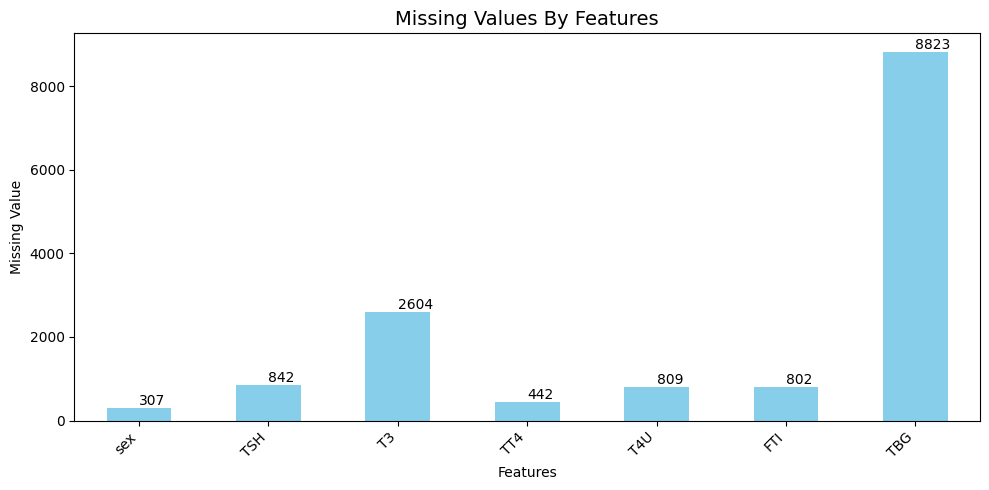

In [11]:
# Fetching the null values for every feature
missing_data = data.isna().sum()

# Filtering out features with zero null values
missing_data = missing_data[missing_data > 0]

# Plotting the graph
plt.figure(figsize=(10, 5))
bars = missing_data.plot(kind = 'bar', color = 'skyblue')

# Add labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # 'int(yval)' ensures integer labels

plt.title('Missing Values By Features', fontsize=14)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Missing Value', fontsize=10)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

We note that there are missing values in some crucial features like 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' and 'TBG'. To address this, we might use imputation techniques. Also, the number of missing values for TBG is too high (8823 out of 9172) so we will have to drop the feature. Moreover, feature like patient_id is not of much significance so we can drop it too.

In [12]:
# Dropping TBG and patient_id columns
data.drop(columns=['TBG', 'patient_id'], inplace=True)

For all the features with float data type (TSH, T3, TT4, T4U, FTI, TBG), we will first check their respective distributions in order to make a better decision regarding the statistical measure that can be used for imputation. If the data is fairly normal we will opt for mean and if it is skewed then we will opt for median as it does not get affected by outliers.

NameError: name 'sns' is not defined

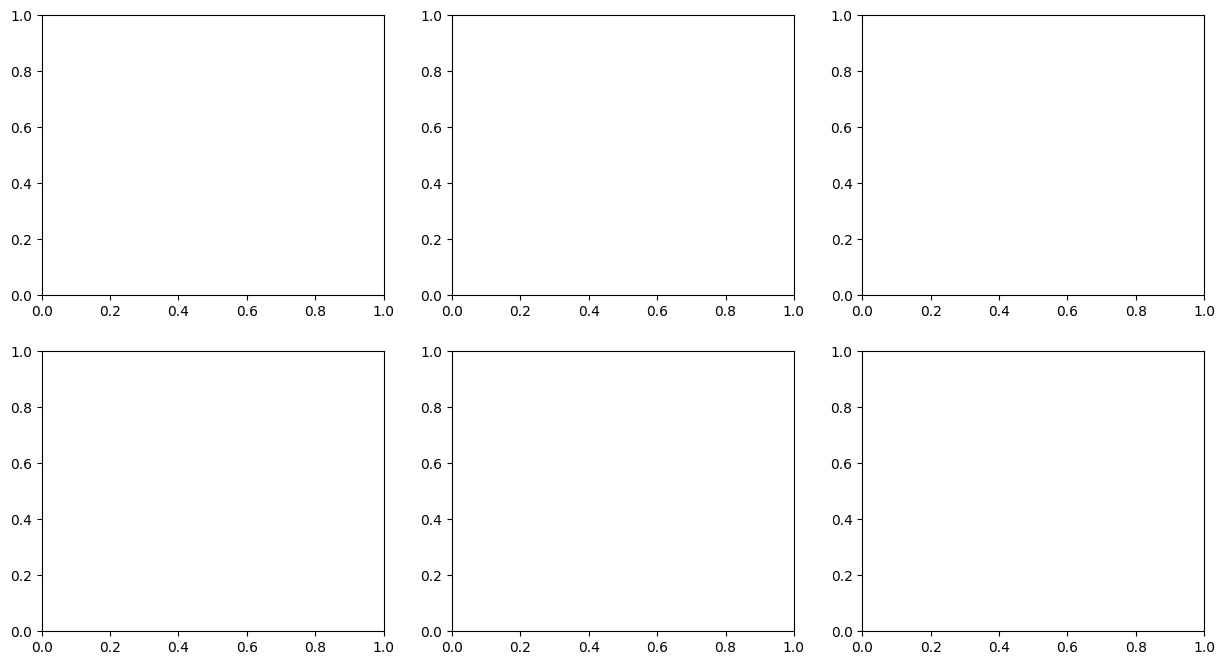

In [13]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten() # Flatten to 1D for easier indexing

# Iterate over columns and plot histograms
metrics = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i, metric in enumerate(metrics):
    sns.histplot(data[metric], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)


# Remove the empty subplot
fig.delaxes(axes[-1])

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

The distributions of TSH, T3, TT4, T4U, and FTI in the ANN Thyroid dataset (for those with measurements taken) exhibit the following characteristics:

**TSH (Thyroid Stimulating Hormone):**

* The distribution is heavily right-skewed, with the majority of values clustered below 5 mU/L.
* There's a long tail extending towards higher TSH values, indicating the presence of individuals with hypothyroidism (underactive thyroid).
* A few outliers exist with very high TSH levels.

**T3 (Total Triiodothyronine):**

* The distribution is approximately normal, centered around 1.5 ng/dL.
* The spread is relatively narrow, suggesting most individuals have T3 levels within a typical range.
* A few outliers exist with very low or high T3 levels.

**TT4 (Total Thyroxine):**

* The distribution is slightly right-skewed, with most values falling between 80 and 120 ng/dL.
* A tail extends towards higher TT4 values, indicating some individuals with hyperthyroidism (overactive thyroid).

**T4U (Thyroxine Uptake):**

* The distribution is roughly normal, centered around 0.9.
* The spread is relatively narrow, similar to T3.

**FTI (Free Thyroxine Index):**

* The distribution is slightly right-skewed, mirroring the TT4 distribution.
* Most values lie between 100 and 140, with a tail extending towards higher values.

**Overall:**

* The distributions of TSH, TT4, and FTI suggest the dataset includes individuals with both hypothyroidism (high TSH, potentially high TT4 and FTI) and hyperthyroidism (low TSH, potentially high TT4 and FTI).
* The T3 and T4U distributions appear more normally distributed, indicating these values are within a typical range for most individuals in the dataset.

## **Exploratory Data Analysis**

In [14]:
# Different referral sources
data['referral_source'].value_counts()

referral_source
other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: count, dtype: int64

Understanding the Spread of data given in boolean values
- True
- False

In [15]:
# whether TBG was measured in blood
data['TBG_measured'].value_counts()

TBG_measured
f    8823
t     349
Name: count, dtype: int64

In [16]:
# whether patient is on thyroxine
data['on_thyroxine'].value_counts()

on_thyroxine
f    7932
t    1240
Name: count, dtype: int64

In [17]:
# whether patient is on thyroxine
data['query_on_thyroxine'].value_counts()

query_on_thyroxine
f    9019
t     153
Name: count, dtype: int64

In [18]:
# whether patient is on antithyroid meds
data['on_antithyroid_meds'].value_counts()

on_antithyroid_meds
f    9056
t     116
Name: count, dtype: int64

In [19]:
# whether patient is sick
data['sick'].value_counts()

sick
f    8828
t     344
Name: count, dtype: int64

In [20]:
# whether patient is pregnant
data['pregnant'].value_counts()

pregnant
f    9065
t     107
Name: count, dtype: int64

In [21]:
# whether patient has undergone thyroid surgery
data['thyroid_surgery'].value_counts()

thyroid_surgery
f    9038
t     134
Name: count, dtype: int64

In [22]:
# whether patient is undergoing T131 treatment
data['I131_treatment'].value_counts()

I131_treatment
f    9003
t     169
Name: count, dtype: int64

In [23]:
# whether patient believes they have hyperthyroid
data['query_hyperthyroid'].value_counts()

query_hyperthyroid
f    8521
t     651
Name: count, dtype: int64

In [24]:
# whether patient believes they have hypothyroid
data['query_hypothyroid'].value_counts()

query_hypothyroid
f    8542
t     630
Name: count, dtype: int64

In [25]:
# whether patient is on lithium
data['lithium'].value_counts()

lithium
f    9079
t      93
Name: count, dtype: int64

In [26]:
# whether patient has goitre
data['goitre'].value_counts()

goitre
f    9088
t      84
Name: count, dtype: int64

In [27]:
# whether patient has tumor
data['tumor'].value_counts()

tumor
f    8931
t     241
Name: count, dtype: int64

In [28]:
# whether patient is psych
data['psych'].value_counts()

psych
f    8754
t     418
Name: count, dtype: int64

In [29]:
# whether T3 was measured in blood
data['T3_measured'].value_counts()

T3_measured
t    6568
f    2604
Name: count, dtype: int64

In [30]:
# whether TT4 was measured in blood
data['TT4_measured'].value_counts()

TT4_measured
t    8730
f     442
Name: count, dtype: int64

In [31]:
# whether T4U was measured in blood
data['T4U_measured'].value_counts()

T4U_measured
t    8363
f     809
Name: count, dtype: int64

In [32]:
# whether FTI was measured in blood
data['FTI_measured'].value_counts()

FTI_measured
t    8370
f     802
Name: count, dtype: int64

In [33]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [34]:
# mapping for target variable
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid",
 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
 'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid",
 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid",
 "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
 }

In [35]:
data['target'] = data['target'].map(map)
data.dropna(subset=['target'], inplace=True)

In [36]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

## **Data Visualisation**

NameError: name 'sns' is not defined

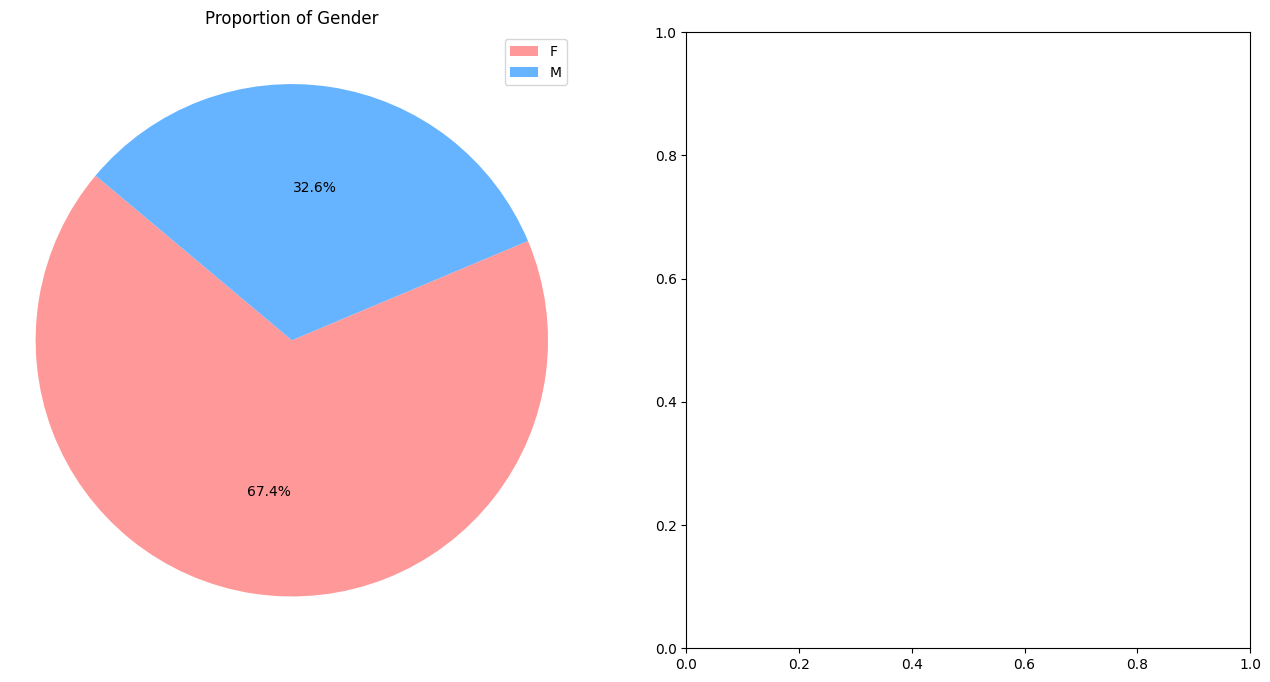

In [37]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

gender_counts=data['sex'].value_counts()

# Pie chart for gender
axes[0].pie(gender_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Proportion of Gender')
axes[0].legend(labels=gender_counts.index, loc='upper right')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Count plot for gender
sns.countplot(data=data, x='sex', palette=['#ff9999', '#66b3ff'], order=gender_counts.index, ax=axes[1])
axes[1].set_title('Count of Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Add informative labels to count plot
for i, count in enumerate(gender_counts):
    axes[1].text(x=i, y=count + 30, s=str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

- The Pie chart suggests that 67.4% data corresponds to Females while Males account for only 32.6%.
- Countplot illustrates that there are total 5008 females and 2417 males.

This clearly suggests that there are more number of females than males.

In [38]:
# Histogram for Age
plt.figure(figsize=(10,5))
sns.histplot(x=data.age, kde=False, color='skyblue')
plt.title('Histogram for Age', size = 16)
plt.xlabel('Age', size= 12)
plt.ylabel('Count', size= 12)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x500 with 0 Axes>

An unusually large bin sizes can be noticed suggesting that there might be some outliers or noise in the dataset. Let's further inspect that.

Text(0.5, 0, 'Age')

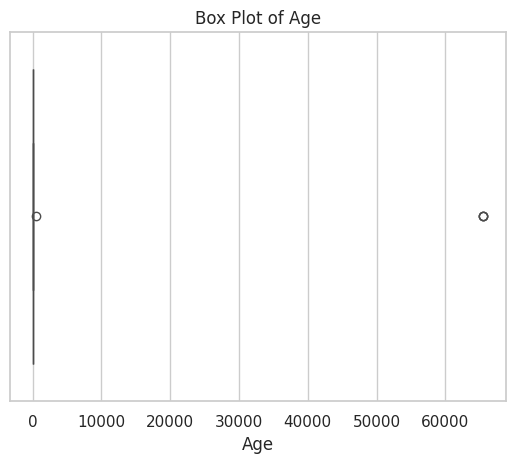

In [555]:
# Boxplot for age
sns.boxplot(x='age', data=data)

# Add title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

In [556]:
# prompt: code to describe only one feature of a dataset

data['age'].describe()

count     7679.000000
mean        77.640839
std       1293.909497
min          1.000000
25%         37.000000
50%         55.000000
75%         67.000000
max      65526.000000
Name: age, dtype: float64

- We can observe the presence of minimum age of 1 year to the maximum age of 65526 which is not possible.
- So, we can remove such outliers and then check for the distribution

In [557]:
# Applying The 3 sigma rule to all the features that are roughly normaly distributed
data = data[data['age'] < (data['age'].mean() + 3*data['age'].std())]
data = data[data['age'] <= 100]

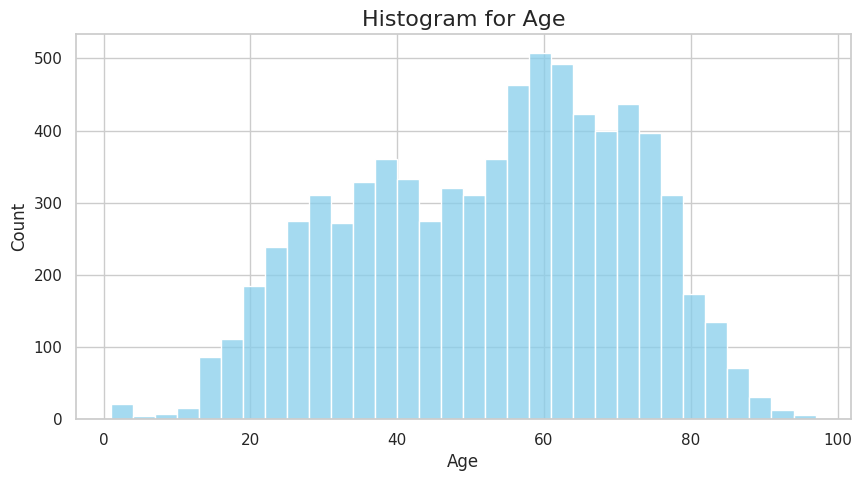

In [558]:
# Histogram for Age
plt.figure(figsize=(10,5))
sns.histplot(x=data.age, kde=False, color='skyblue')
plt.title('Histogram for Age', size = 16)
plt.xlabel('Age', size= 12)
plt.ylabel('Count', size= 12)
plt.show()

* The histogram depicts that the data is concentrated for individuals aged 20-80, peaking between 57 to 63 years.
* There is a decline in the age group of 1-15 and 90-100 suggesting fewer individuals in both younger and older categories.
* We can create age groups and a countplot to calculate total number of individuals in each age group for a better understanding of the data.

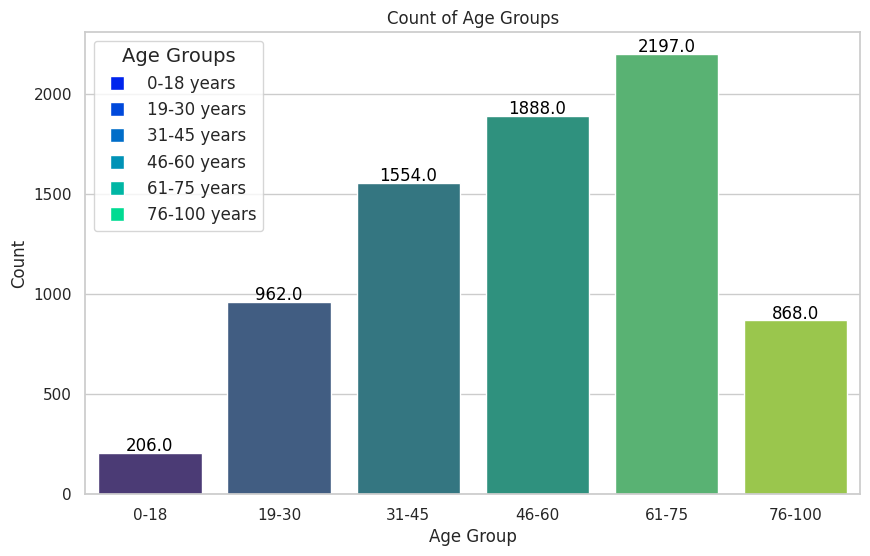

In [559]:
# Define age bins and labels
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']

# Create a copy of the DataFrame
data_age_group = data.copy()

# Create a new column for age groups in the copied DataFrame
data_age_group['age_group'] = pd.cut(data_age_group['age'], bins=age_bins, labels=age_labels, right=False)

# Plot count plot for age groups
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_age_group, x='age_group', palette='viridis')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Create custom legend
legend_labels = ['0-18 years', '19-30 years', '31-45 years', '46-60 years', '61-75 years', '76-100 years']
colors = sns.color_palette('winter', n_colors=len(legend_labels))
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', label=label, markersize=10, markerfacecolor=color)
                  for label, color in zip(legend_labels, colors)]
plt.legend(handles=legend_patches, title='Age Groups', title_fontsize='14', fontsize='12')

plt.title('Count of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

* Most number of people are between the age group of 61-75 followed by 46-60 and 31-45. The graph drops after reaching at it's peak at 61-75. This might be because there are fewer number of people who stay alive after that age.
* There are fewer number of people between the age group of 19-30 and 76-100. Interestingly, on comparing the two, their difference is not significant. So, this suggests that the likelihood of getting Thyroid for the old adults (76-100) is similar to young adults (19-30).
* The least number of people belong to the young age group.

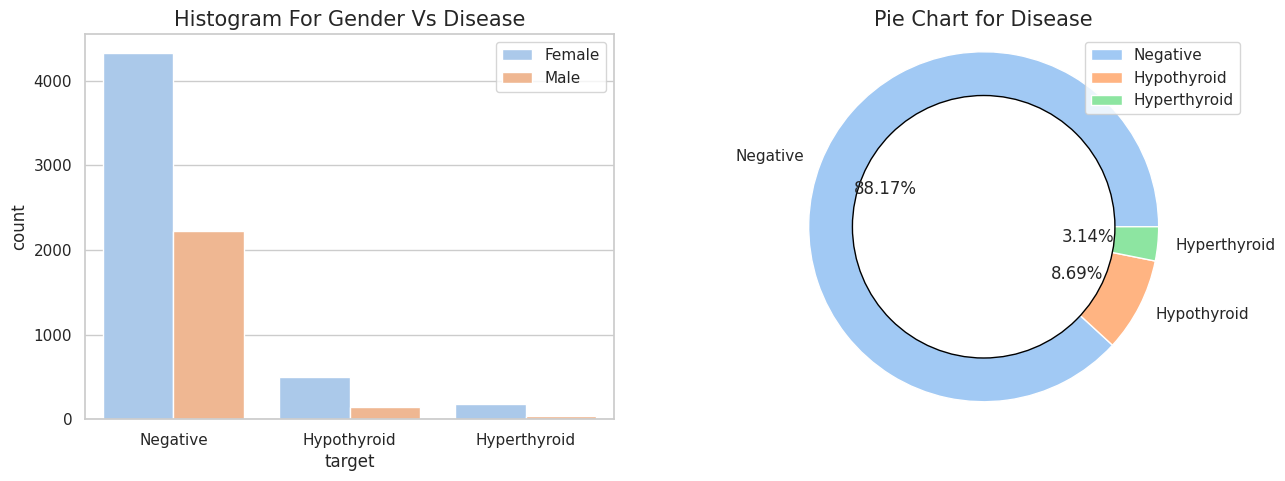

In [560]:
# Plotting For Gender
sns.set_palette('pastel')
labels = ['Female','Male']
plt.figure(figsize=(15,5))

# Creating a Grouped bar chart for Gender Vs Disease
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='target', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender Vs Disease',size=15)

# Creating a Pie Chart for Disease
plt.subplot(1, 2, 2)
Negative, Hypothyroid, Hyperthyroid = data['target'].value_counts()
y = [Negative, Hypothyroid, Hyperthyroid]

explode = [0, 0.0, 0]
labels = ['Negative', 'Hypothyroid','Hyperthyroid']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)

plt.title('Pie Chart for Disease', size=15)
plt.show()

* The histogram illustrates the prevalence of different diseases across genders, revealing a higher occurrence in females. The majority of cases fall into the "Negative" category, indicating the absence of the depicted diseases. **Hypothyroidism** is the most common, followed by **Hyperthyroidism**.
*  Meanwhile, the pie chart highlights that the "Negative" category constitutes 88.17% of cases, with Hyperthyroidism and Hypothyroidism accounting for 8.69% and 3.14%, respectively.

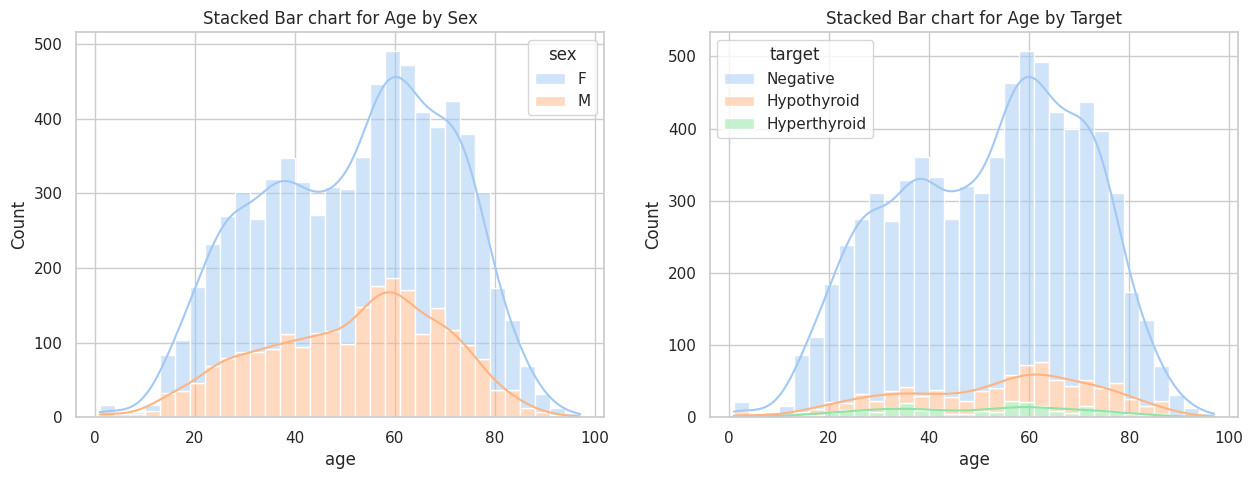

In [561]:
# Stacked Histogram for Age by Sex and age by Target
plt.figure(figsize=(15, 5))

# Plot for Age by Sex
plt.subplot(1, 2, 1)
sns.histplot(data, x='age', hue='sex', multiple='stack', kde=True)
plt.title('Stacked Bar chart for Age by Sex')

# Plot for Age by Target
plt.subplot(1, 2, 2)
sns.histplot(data, x='age', hue='target', multiple='stack', kde=True)
plt.title('Stacked Bar chart for Age by Target')

plt.show()

#### Gender By Age:
- Females (F) are more prevalent in the dataset than males (M). This is evident from the larger proportion of blue (F) bars compared to orange (M) bars.
- The age distribution for both genders is similar. Both males and females predominantly fall within the age range of 20-60, with the peak frequency around 40-50 years.

#### Target Distribution:
- The majority of individuals have a negative diagnosis. This is indicated by the large proportion of blue (Negative) bars in the right chart.
- The incidence of hypothyroidism is higher than hyperthyroidism. The orange (Hypothyroid) bars are slightly more frequent than the green (Hyperthyroid) bars.
- Age seems to play a role in the likelihood of thyroid disorders. The frequency of both hypothyroidism and hyperthyroidism appears to increase with age, especially in the 40-60 age range. However, the negative diagnosis still remains dominant across all age groups.

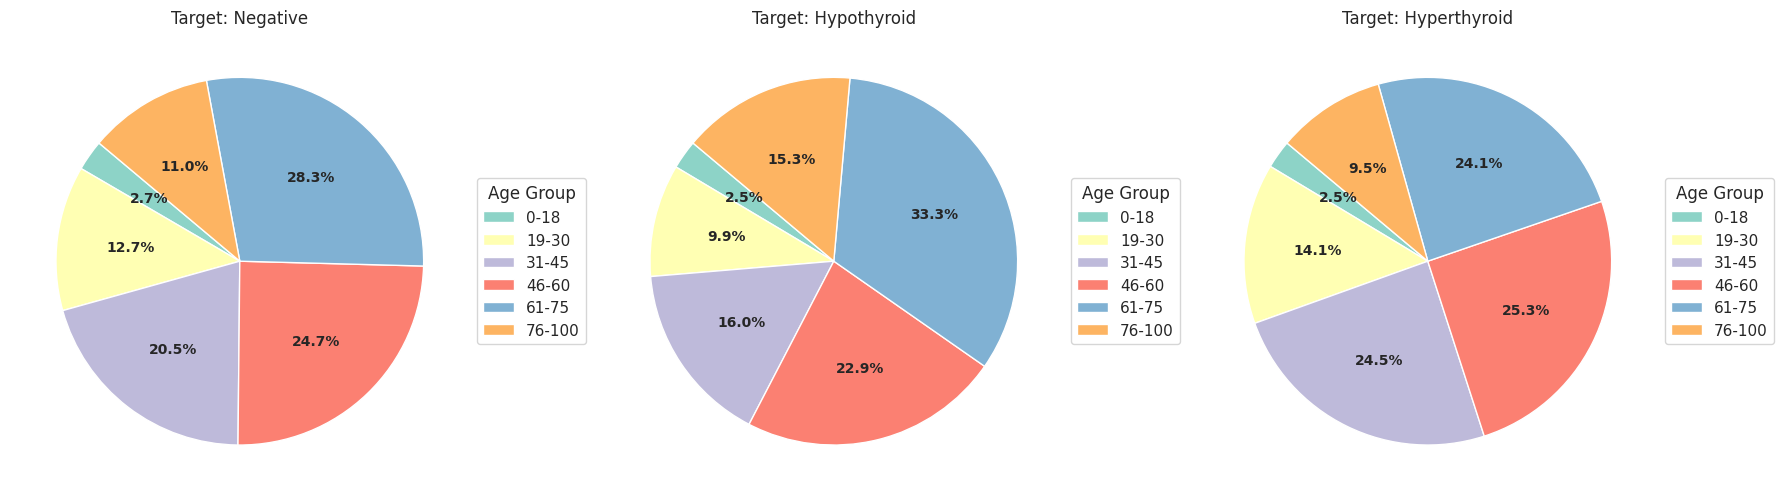

In [562]:
# Create pie charts for each target category segregated by age groups
target_categories = data_age_group['target'].unique()

fig, axes = plt.subplots(1, len(target_categories), figsize=(18, 8), subplot_kw=dict(aspect="equal"))

for ax, target in zip(axes, target_categories):
    age_group_counts = data_age_group[data_age_group['target'] == target]['age_group'].value_counts().sort_index()
    wedges, texts, autotexts = ax.pie(age_group_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(age_group_counts)))
    ax.set_title(f'Target: {target}')
    ax.legend(wedges, age_group_counts.index, title="Age Group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Customize text
    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12)

plt.tight_layout()
plt.show()

The pie charts depict the age distribution across three different thyroid conditions:

**Negative:**

* The majority of individuals with a negative diagnosis fall within the 61-75 age range (28.3%).
* The second most common age group is 46-60 (24.7%).
* The least represented age group is 0-18 (2.7%).

**Hypothyroid:**

* The most frequent age range for hypothyroid individuals is also 61-75 (33.3%).
* 31-45 and 76-100 age groups have similar representation (around 16%).
* The smallest proportion of individuals with hypothyroidism are found in the 0-18 age range (2.5%).

**Hyperthyroid:**

* Unlike to the other conditions, 31-45, 46-60 and 61-75 age groups have similar representation (around 24% to 25%).
* The least frequent age group is again 0-18 (2.5%).

**Overall:**

* **Across all three conditions, the 61-75 age range is the most common.** This suggests that thyroid conditions are more prevalent in old-aged individuals.
* **The proportion of older individuals (76-100) with hypothyroidism is slightly higher** than in the other two groups, indicating a potential increased risk of hypothyroidism in later life.
* **Thyroid conditions appear to be less common in younger individuals (0-18).** However, this could also be due to different sampling rates among age groups in the dataset.

These pie charts provide a good overview of the age distribution associated with different thyroid diagnoses. It's important to note that further analysis would be needed to determine if these observed patterns are statistically significant and to explore potential underlying causes for the age-related differences.


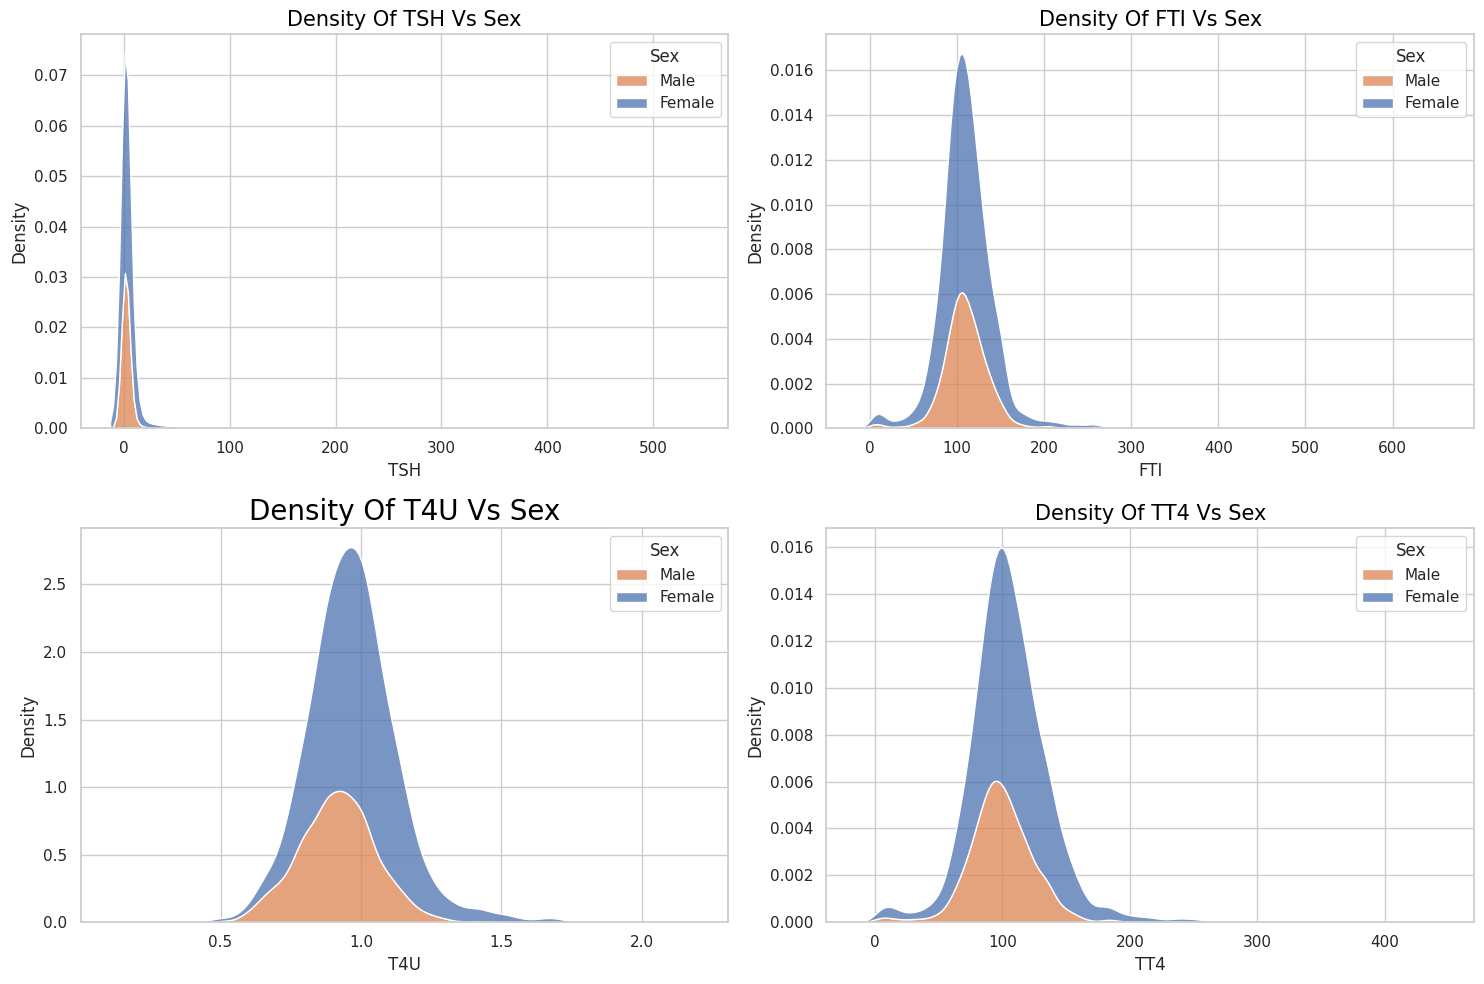

In [563]:
# Creating Density plot
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

# Density of TSH vs Sex
plt.subplot(2, 2, 1)
sns.kdeplot(data=data, x="TSH", hue="sex", multiple="stack", fill=True)
plt.title("Density Of TSH Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

# Density Of FTI Vs Sex
plt.subplot(2, 2, 2)
sns.kdeplot(data=data, x='FTI', hue="sex", multiple="stack", fill=True)
plt.title("Density Of FTI Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

# Density Of T4U Vs Sex
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='T4U', hue="sex", multiple="stack", fill=True)
plt.title("Density Of T4U Vs Sex", fontsize=20, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

# Density Of TT4 Vs Sex
plt.subplot(2, 2, 4)
sns.kdeplot(data=data, x="TT4", hue="sex", multiple="stack", fill=True)
plt.title("Density Of TT4 Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.tight_layout()

plt.show()


- The first chart shows the density of TSH (thyroid-stimulating hormone) versus sex. The x-axis shows the TSH level,
and the y-axis shows the density. The chart shows that TSH levels are higher in females than in males.
- The second chart shows the density of FTI (free thyroxine index) versus sex. The x-axis shows the FTI level, and the
y-axis shows the density. The chart shows that FTI levels are higher in females than in males.
- The third chart shows the density of T4U (total thyroxine uptake) versus sex. The x-axis shows the T4U level, and
the y-axis shows the density. The chart shows that T4U levels are higher in females than in males.
- The fourth chart shows the density of TT4 (total thyroxine) versus sex. The x-axis shows the TT4 level, and the y-axis shows the density.The chart shows that TT4 levels are higher in females than in male

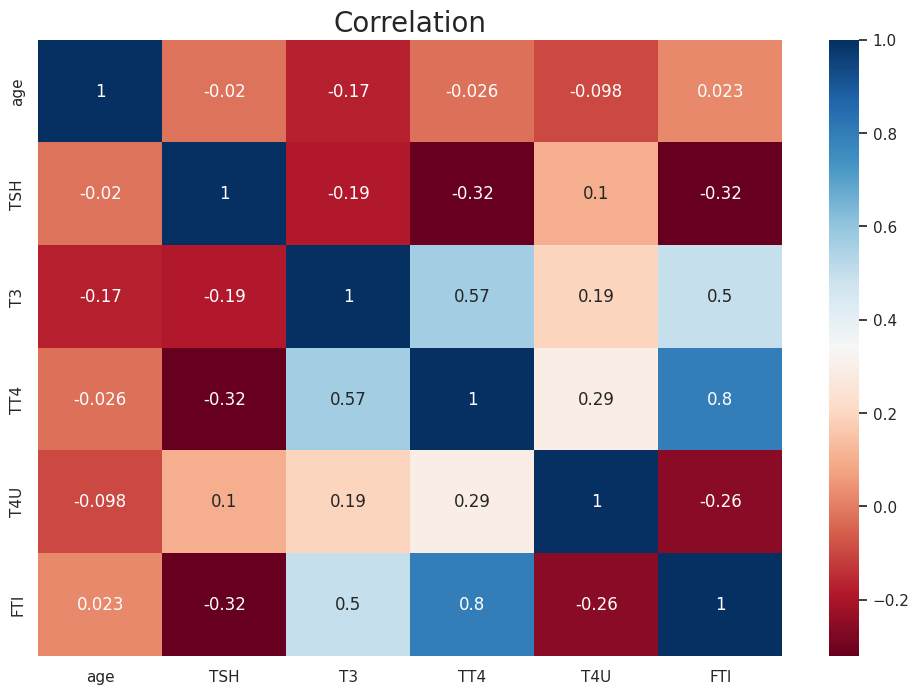

In [564]:
# Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True,cmap='RdBu')

plt.title("Correlation",fontsize=20)
plt.show()

- **Age:** Age has a weak negative correlation with TSH and T3, and a weak positive correlation with TT4, T4U, and FTI.
This means that as people age, their TSH and T3 levels tend to decrease, while their TT4, T4U, and FTI levels tend
to increase.
- **TSH:** TSH has a strong negative correlation with T3, TT4, T4U, and FTI. This means that when TSH levels are high,
the levels of other thyroid hormones tend to be low, and vice versa. This is because TSH stimulates the production
of T3 and T4 by the thyroid gland.
- **T3:** T3 has a strong positive correlation with TT4 and T4U, and a moderate positive correlation with FTI. This means
that T3 levels tend to be higher when TT4, T4U, and FTI levels are also higher.
- **TT4:** TT4 has a strong positive correlation with T4U and FTI. This means that TT4 levels tend to be higher when
T4U and FTI levels are also higher

**These correlation values are just for the numerical features but the categorical features also might have a significant impact on the target variable. So, let's encode them and check their correlation with the target variable.**

In [565]:
from sklearn.preprocessing import OneHotEncoder

# Assuming data is already defined and loaded
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

# Create a copy of the data
corr_data = data.copy()

# Prepare for encoding
encoded_data_sets = []
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder.fit(corr_data[categorical_columns])

# Encode and concatenate the data
encoded_array = encoder.transform(corr_data[categorical_columns])
one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), index=corr_data.index)
corr_data = pd.concat([corr_data, one_hot_columns_df], axis=1).drop(categorical_columns, axis=1)

# Append to the list of encoded data sets
encoded_data_sets.append(corr_data)

# Retrieve the first encoded data set
corr_data = encoded_data_sets[0]
corr_data

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'target']


,age,TSH,T3,TT4,T4U,FTI,sex_M,sex_nan,on_thyroxine_t,query_on_thyroxine_t,...,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,target_Hypothyroid,target_Negative
0,29,0.3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,29,1.6,1.9,128.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,41,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,36,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,60,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,NaN,NaN,88.0,0.74,119.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9167,56,NaN,NaN,64.0,0.83,77.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9168,22,NaN,NaN,91.0,0.92,99.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9170,47,NaN,NaN,75.0,0.85,88.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Positive Correlations:
                Feature1        Feature2  Correlation
9         FTI_measured_t  T4U_measured_t     0.992731
2                    FTI             TT4     0.798125
6         T4U_measured_t  TT4_measured_t     0.695964
8         FTI_measured_t  TT4_measured_t     0.688954
0                    TT4              T3     0.567037
10  referral_source_SVHC         psych_t     0.556687
4         TT4_measured_t  TSH_measured_t     0.543213
1                    FTI              T3     0.499359
11    target_Hypothyroid             TSH     0.454250
7         FTI_measured_t  TSH_measured_t     0.378657
5         T4U_measured_t  TSH_measured_t     0.374292
3          T3_measured_t  TSH_measured_t     0.306950

Negative Correlations:
                 Feature1              Feature2  Correlation
11        target_Negative    target_Hypothyroid    -0.842211
3          TBG_measured_t        TT4_measured_t    -0.722583
7   referral_source_other   referral_source_SVI    -0.720126
5      

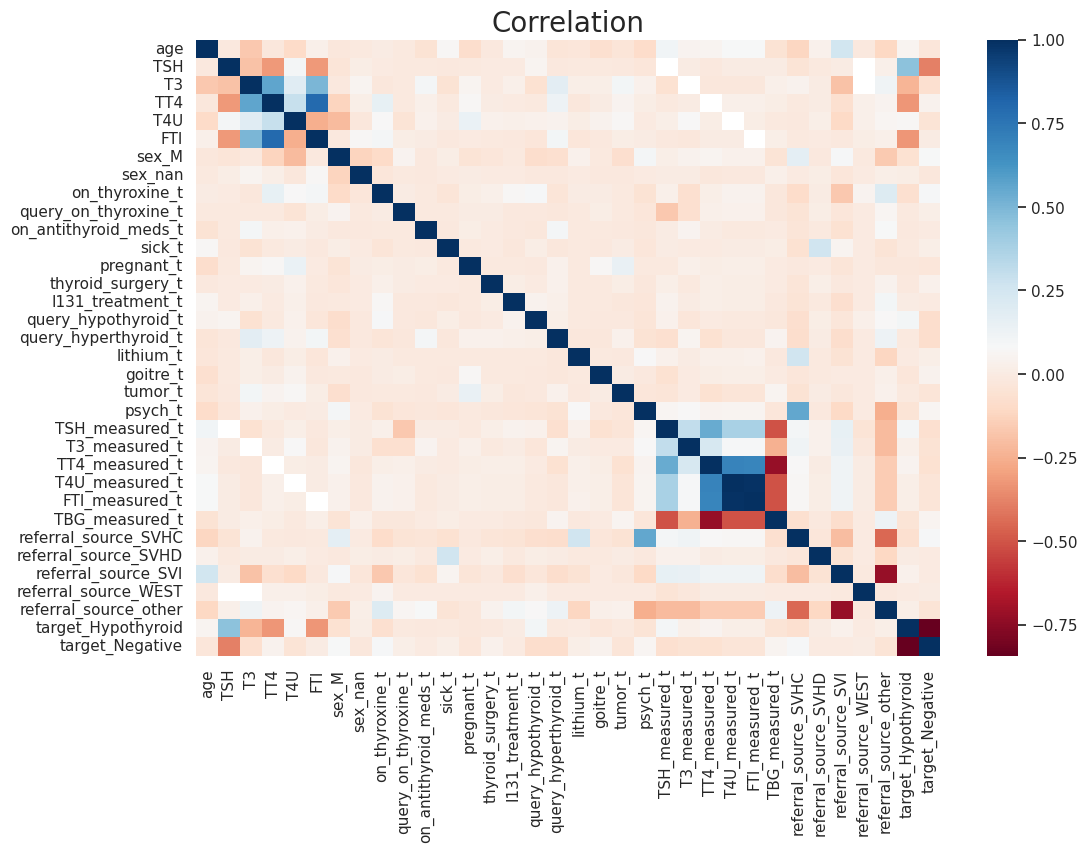

In [566]:
# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than a threshold (0.3)
positively_correlated = [(col, idx, correlation_matrix.loc[col, idx]) for col in upper_triangle.columns for idx in upper_triangle.index if upper_triangle.loc[idx, col] > 0.3]

# Find index of feature columns with negative correlation less than a threshold (-0.3)
negatively_correlated = [(col, idx, correlation_matrix.loc[col, idx]) for col in upper_triangle.columns for idx in upper_triangle.index if upper_triangle.loc[idx, col] < -0.3]

# Find index of feature columns with positive correlation less than a threshold (0.3)
positive_low_corr = [(col, idx, correlation_matrix.loc[col, idx]) for col in upper_triangle.columns for idx in upper_triangle.index if 0.2 < upper_triangle.loc[idx, col] < 0.3]

# Find index of feature columns with negative correlation greater than a threshold (-0.3)
negative_low_corr = [(col, idx, correlation_matrix.loc[col, idx]) for col in upper_triangle.columns for idx in upper_triangle.index if -0.3 < upper_triangle.loc[idx, col] < -0.2]

# Convert to DataFrame for better readability
positive_corr_df = pd.DataFrame(positively_correlated, columns=['Feature1', 'Feature2', 'Correlation'])
negative_corr_df = pd.DataFrame(negatively_correlated, columns=['Feature1', 'Feature2', 'Correlation'])
positive_low_corr_df = pd.DataFrame(positive_low_corr, columns=['Feature1', 'Feature2', 'Correlation'])
negative_low_corr_df = pd.DataFrame(negative_low_corr, columns=['Feature1', 'Feature2', 'Correlation'])

# Display top correlated features
print("Positive Correlations:")
print(positive_corr_df.sort_values(by='Correlation', ascending=False))

print("\nNegative Correlations:")
print(negative_corr_df.sort_values(by='Correlation'))

print("\nPositive Low Correlations:")
print(positive_low_corr_df.sort_values(by='Correlation', ascending=False))

print("\nNegative Low Correlations:")
print(negative_low_corr_df.sort_values(by='Correlation'))

# Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(),annot=False,cmap='RdBu')
plt.title("Correlation",fontsize=20)
plt.grid(False)
plt.show()

## **Splitting Data**

In [39]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,other,Negative
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,other,Negative
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,Negative
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,Negative
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,F,f,f,f,f,f,f,f,f,...,NaN,t,88.0,t,0.74,t,119.0,f,SVI,Negative
9167,56,M,f,f,f,f,f,f,f,f,...,NaN,t,64.0,t,0.83,t,77.0,f,SVI,Negative
9168,22,M,f,f,f,f,f,f,f,f,...,NaN,t,91.0,t,0.92,t,99.0,f,SVI,Negative
9170,47,F,f,f,f,f,f,f,f,f,...,NaN,t,75.0,t,0.85,t,88.0,f,other,Negative


In [40]:
#Initialising the target variable
target=data["target"]
data=data.drop("target", axis=1, errors="ignore")

# Splitting Data for Training (80%) & Testing (20%) with stratification
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=20, test_size=0.2, stratify=target)
print("Train-Test Split Successful")

Train-Test Split Successful


In [41]:
target

0       Negative
1       Negative
2       Negative
3       Negative
5       Negative
          ...   
9166    Negative
9167    Negative
9168    Negative
9170    Negative
9171    Negative
Name: target, Length: 7679, dtype: object

In [42]:
print("The X_train shape is: ", X_train.shape)
print("The X_test shape is: ", X_test.shape)


The X_train shape is:  (6143, 28)
The X_test shape is:  (1536, 28)


In [43]:
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
7773,77,F,f,f,f,f,f,f,f,f,...,t,1.4,t,91.0,t,0.81,t,112.0,f,SVI
1650,22,F,f,f,f,f,f,f,f,f,...,f,NaN,t,110.0,t,1.03,t,107.0,f,other
327,60,M,f,f,f,f,f,f,f,f,...,t,2.0,t,130.0,t,0.94,t,138.0,f,SVI
1115,46,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,t,other
5037,57,NaN,f,f,f,f,f,f,f,f,...,t,2.6,t,79.0,t,0.84,t,93.0,f,other


## **Null Values Imputation**

In [44]:
X_train.isnull().sum()

age                       0
sex                     199
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     573
T3_measured               0
T3                     1790
TT4_measured              0
TT4                     279
T4U_measured              0
T4U                     536
FTI_measured              0
FTI                     529
TBG_measured              0
referral_source           0
dtype: int64

In [45]:
# Imputation using mode for the 'sex' feature
X_train['sex'].fillna(X_train['sex'].mode()[0], inplace=True)

In [46]:
X_train.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     573
T3_measured               0
T3                     1790
TT4_measured              0
TT4                     279
T4U_measured              0
T4U                     536
FTI_measured              0
FTI                     529
TBG_measured              0
referral_source           0
dtype: int64

In [47]:
X_train.loc[:,['TSH','T3','TT4','T4U','FTI',]].skew()

TSH    11.917122
T3      2.744631
TT4     1.280311
T4U     0.622504
FTI     3.668995
dtype: float64

**-1.96 to 1.96 - Roughly Normal Distribution**


Imputation - Train set

In [48]:
# Imputation using median for 'TSH', 'T3' and 'FTI' features
X_train['TSH'].fillna(X_train['TSH'].median(), inplace=True)
X_train['T3'].fillna(X_train['T3'].median(), inplace=True)
X_train['FTI'].fillna(X_train['FTI'].median(), inplace=True)

# Imputation using mean for 'TT4' and 'T4U' features
X_train['TT4'].fillna(X_train['TT4'].mean(), inplace=True)
X_train['T4U'].fillna(X_train['T4U'].mean(), inplace=True)

In [49]:
X_train.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
dtype: int64

Imputation for Test set

In [50]:
X_test.isnull().sum()

age                      0
sex                     55
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    151
T3_measured              0
T3                     419
TT4_measured             0
TT4                     75
T4U_measured             0
T4U                    145
FTI_measured             0
FTI                    145
TBG_measured             0
referral_source          0
dtype: int64

In [51]:
# Imputation using mode for the 'sex' feature
X_test['sex'].fillna(X_train['sex'].mode()[0], inplace=True)

# Imputation using median for 'TSH', 'T3' and 'FTI' features
X_test['TSH'].fillna(X_train['TSH'].median(), inplace=True)
X_test['T3'].fillna(X_train['T3'].median(), inplace=True)
X_test['FTI'].fillna(X_train['FTI'].median(), inplace=True)

# Imputation using mean for 'TT4' and 'T4U' features
X_test['TT4'].fillna(X_train['TT4'].mean(), inplace=True)
X_test['T4U'].fillna(X_train['T4U'].mean(), inplace=True)

X_test.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
dtype: int64

NameError: name 'sns' is not defined

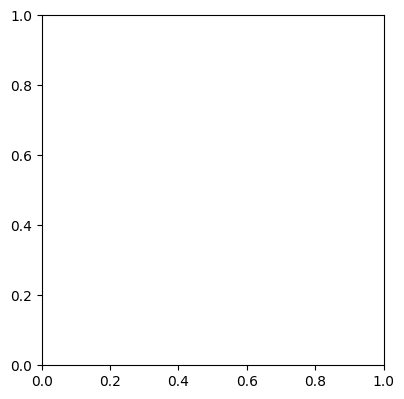

In [52]:
# Create the boxplot for Age
plt.figure(figsize=(15,10))

# Create the boxplot for TSH
plt.subplot(2, 3, 1)
sns.boxplot(x='TSH', data=X_train)

# Add title and labels
plt.title('Box Plot of TSH')
plt.xlabel('TSH')

# Create the boxplot for T3
plt.subplot(2, 3, 2)
sns.boxplot(x='T3', data=X_train)

# Add title and labels
plt.title('Box Plot of T3')
plt.xlabel('T3')

# Create the boxplot for TT4
plt.subplot(2, 3, 3)
sns.boxplot(x='TT4', data=X_train)

# Add title and labels
plt.title('Box Plot of TT4')
plt.xlabel('TT4')

# Create the boxplot for T4U
plt.subplot(2, 3, 4)
sns.boxplot(x='T4U', data=X_train)

# Add title and labels
plt.title('Box Plot of T4U')
plt.xlabel('T4U')

# Create the boxplot for FTI
plt.subplot(2, 3, 5)
sns.boxplot(x='FTI', data=X_train)

# Add title and labels
plt.title('Box Plot of FTI')
plt.xlabel('FTI')

plt.tight_layout()
plt.show()

### Handling Outliers

### Numerical Data
- if the data is following normal distribution, anything beyond mean + 3SD can be considered as an outlier.
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR.
### Categorical Data
- If the column is highly imbalanced for eg male 10000 and female 2 then we can eliminate female.

In [53]:
data_sets = [X_train, X_test]

for i in range(len(data_sets)):
  #data_sets[i] = data_sets[i][data_sets[i]['age'] < (data_sets[i]['age'].mean() + 3*data_sets[i]['age'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['T3'] < (data_sets[i]['T3'].mean() + 3*data_sets[i]['T3'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['T4U'] < (data_sets[i]['T4U'].mean() + 3*data_sets[i]['T4U'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['TSH'] < (data_sets[i]['TSH'].mean() + 3*data_sets[i]['TSH'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['TT4'] < (data_sets[i]['TT4'].mean() + 3*data_sets[i]['TT4'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['FTI'] < (data_sets[i]['FTI'].mean() + 3*data_sets[i]['FTI'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['age'] <= 100]

## **One hot encoding**

In [54]:

from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

data_sets =[X_train,X_test]
encoded_data_sets = []

encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])



['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']


,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [55]:
for i in range(len(data_sets)):
  encoded_array =  encoder.transform(data_sets[i][categorical_columns])
  one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), index=data_sets[i].index)
  data = pd.concat([data_sets[i], one_hot_columns_df], axis=1)
  encoded_data_sets.append(data.drop(categorical_columns, axis=1))


X_train = encoded_data_sets[0]
X_test = encoded_data_sets[1]

print(X_train.shape)
print(X_test.shape)

(6143, 31)
(1536, 31)


In [56]:
X_train.head()

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,...,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
7773,77,0.12,1.4,91.000000,0.810000,112.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1650,22,1.40,1.9,110.000000,1.030000,107.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
327,60,0.10,2.0,130.000000,0.940000,138.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1115,46,1.40,1.9,105.354649,0.966526,108.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5037,57,0.67,2.6,79.000000,0.840000,93.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Importance

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest to get feature importance
feature_imp_rf_model = RandomForestClassifier(random_state=42)
feature_imp_rf_model.fit(X_train, y_train)

# Get feature importances
importances = feature_imp_rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [62]:
# List of selected features
selected_features = ['age','sex_M','TSH','T3','TT4','T4U','FTI', 'on_thyroxine_t']

# Filter train and test sets to keep only selected features
X_train_reduced = X_train[selected_features].copy()
X_test_reduced = X_test[selected_features].copy()

# Check the shape to ensure features are correctly filtered
print(f"Reduced train set shape: {X_train_reduced.shape}")
print(f"Reduced test set shape: {X_test_reduced.shape}")


Reduced train set shape: (6143, 8)
Reduced test set shape: (1536, 8)


In [63]:
X_train_reduced

,age,sex_M,TSH,T3,TT4,T4U,FTI,on_thyroxine_t
7773,77,0.0,0.12,1.4,91.000000,0.810000,112.0,0.0
1650,22,0.0,1.40,1.9,110.000000,1.030000,107.0,0.0
327,60,1.0,0.10,2.0,130.000000,0.940000,138.0,0.0
1115,46,0.0,1.40,1.9,105.354649,0.966526,108.0,0.0
5037,57,0.0,0.67,2.6,79.000000,0.840000,93.0,0.0
...,...,...,...,...,...,...,...,...
7028,15,0.0,3.10,1.9,88.000000,0.740000,119.0,0.0
6635,45,1.0,2.10,1.9,117.000000,0.990000,118.0,0.0
6159,33,1.0,0.56,2.4,97.000000,0.966526,108.0,0.0
1199,17,0.0,0.30,2.8,147.000000,1.280000,116.0,0.0


In [64]:
X_test_reduced

,age,sex_M,TSH,T3,TT4,T4U,FTI,on_thyroxine_t
8099,72,0.0,8.799999,0.6,40.000000,0.830000,48.0,0.0
5341,76,1.0,0.690000,2.3,138.000000,1.040000,133.0,0.0
8866,19,0.0,500.000000,0.5,5.000000,1.190000,4.0,0.0
4903,41,0.0,1.200000,2.7,113.000000,1.060000,107.0,0.0
877,27,0.0,2.700000,1.8,102.000000,1.090000,94.0,0.0
...,...,...,...,...,...,...,...,...
483,23,0.0,1.400000,1.9,105.354649,0.966526,108.0,0.0
5458,47,0.0,0.005000,2.0,128.000000,0.940000,136.0,0.0
6187,71,1.0,2.800000,1.9,106.000000,0.880000,120.0,0.0
5836,28,0.0,3.000000,2.1,136.000000,0.966526,108.0,0.0


# Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Define numeric columns for scaling
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Apply MinMaxScaler only to numeric columns
scaler = MinMaxScaler()

# Fit and transform the scaler on the numeric columns of the training set
X_train_reduced[numeric_columns] = scaler.fit_transform(X_train_reduced[numeric_columns])

# Transform the numeric columns of the test set
X_test_reduced[numeric_columns] = scaler.transform(X_test_reduced[numeric_columns])


In [66]:
X_train_reduced.head()

,age,sex_M,TSH,T3,TT4,T4U,FTI,on_thyroxine_t
7773,0.001160,0.0,0.000217,0.101887,0.207944,0.299465,0.132044,0.0
1650,0.000320,0.0,0.002632,0.139623,0.252336,0.417112,0.126074,0.0
327,0.000900,1.0,0.000179,0.147170,0.299065,0.368984,0.163085,0.0
1115,0.000687,0.0,0.002632,0.139623,0.241483,0.383169,0.127268,0.0
5037,0.000855,0.0,0.001255,0.192453,0.179907,0.315508,0.109360,0.0


In [67]:
X_test_reduced.head()

,age,sex_M,TSH,T3,TT4,T4U,FTI,on_thyroxine_t
8099,0.001084,0.0,0.016594,0.041509,0.088785,0.310160,0.055635,0.0
5341,0.001145,1.0,0.001292,0.169811,0.317757,0.422460,0.157116,0.0
8866,0.000275,0.0,0.943396,0.033962,0.007009,0.502674,0.003104,0.0
4903,0.000610,0.0,0.002255,0.200000,0.259346,0.433155,0.126074,0.0
877,0.000397,0.0,0.005085,0.132075,0.233645,0.449198,0.110554,0.0


In [68]:
# Further split X_train into train and validation sets (80% train, 20% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_reduced, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [69]:
# Checking the shape of train, test and validation set
print(f"X_train set shape:{X_train_final.shape} and y_train set shape:{y_train.shape}")
print(f"X_Validation set shape:{X_val.shape} and X_Validation set shape:{y_val.shape}")
print(f"X_test set shape:{X_test_reduced.shape} and y_test set shape: {y_test.shape}")

X_train set shape:(4914, 8) and y_train set shape:(6143,)
X_Validation set shape:(1229, 8) and X_Validation set shape:(1229,)
X_test set shape:(1536, 8) and y_test set shape: (1536,)


In [70]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [71]:
# Define models for baseline
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


In [ ]:
joblib.dump(rf_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'KNN_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(rf_model, 'Gradient_Boosting_model.pkl')
joblib.dump(rf_model, 'svm_model.pkl')

In [77]:
import joblib

In [78]:
# Train baseline models
for name, model in models.items():
    model.fit(X_train, y_train)
    val_preds = model.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_preds)
    val_precision = precision_score(y_test, val_preds, average='weighted')
    val_recall = recall_score(y_test, val_preds, average='weighted')
    val_f1 = f1_score(y_test, val_preds, average='weighted')
    print(f"\n{name} Baseline Performance:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1 Score: {val_f1:.4f}")
    print(f"\nClassification Report for {name} on Test Set:")
    print(classification_report(y_test, val_preds))

    # Save the trained model to a file using joblib
    model_filename = f'{name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_filename)
    print(f"Model '{name}' saved as {model_filename}")


Decision Tree Baseline Performance:
Accuracy: 0.9818
Precision: 0.9817
Recall: 0.9818
F1 Score: 0.9816

Classification Report for Decision Tree on Test Set:
              precision    recall  f1-score   support

Hyperthyroid       0.83      0.81      0.82        48
 Hypothyroid       0.99      0.93      0.96       134
    Negative       0.99      0.99      0.99      1354

    accuracy                           0.98      1536
   macro avg       0.94      0.91      0.92      1536
weighted avg       0.98      0.98      0.98      1536

Model 'Decision Tree' saved as decision_tree_model.pkl

KNN Baseline Performance:
Accuracy: 0.9538
Precision: 0.9537
Recall: 0.9538
F1 Score: 0.9499

Classification Report for KNN on Test Set:
              precision    recall  f1-score   support

Hyperthyroid       0.86      0.77      0.81        48
 Hypothyroid       0.96      0.61      0.75       134
    Negative       0.96      0.99      0.97      1354

    accuracy                           0.95      1

In [ ]:
# Define models and their parameter grids for hyperparameter tuning
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'model__max_depth': [3, 5, 7, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'model__n_neighbors': [3, 5, 7, 9]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 1]}
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
    }
}

In [ ]:
# Hyperparameter tuning using GridSearchCV with cross-validation
best_models = {}
for name, model_info in model_params.items():
    pipeline = Pipeline(steps=[('model', model_info['model'])])
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(pipeline, model_info['params'], cv=skf)
    clf.fit(X_train, Y_train)
    best_models[name] = clf.best_estimator_
    print(f"{name} best params: {clf.best_params_}")

In [ ]:
# Evaluate on validation set
for name, model in best_models.items():
    val_preds = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val, val_preds)
    print(f"\n{name} Validation Accuracy: {val_accuracy:.4f}")
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(Y_val, val_preds))

In [ ]:
# Evaluate on test set
for name, model in best_models.items():
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_preds)
    print(f"\n{name} Test Accuracy: {test_accuracy:.4f}")
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(Y_test, test_preds))

Based on the results, Gradient Boosting and Random Forest show the best performance, both on the validation and test sets. Here is a summary of the results and some observations:

### Summary of Results

1. **Decision Tree**:
    - Validation Accuracy: 0.9772
    - Test Accuracy: 0.9863
    - Precision and Recall: Balanced performance across all classes (Hyperthyroid, Hypothyroid, Negative).
    - Observation: Shows good generalization with minimal signs of overfitting based on validation results.

2. **KNN**:
    - Validation Accuracy: 0.9243
    - Test Accuracy: 0.9154
    - Precision and Recall: Lower performance on Hyperthyroid and Hypothyroid classes compared to Decision Tree and other models.
    - Observation: Shows signs of underfitting, especially for minority classes (Hyperthyroid, Hypothyroid).

3. **Random Forest**:
    - Validation Accuracy: 0.9821
    - Test Accuracy: 0.9863
    - Precision and Recall: High performance across all classes, similar to Decision Tree.
    - Observation: Slightly better than Decision Tree in terms of generalization and robustness.

4. **Gradient Boosting**:
    - Validation Accuracy: 0.9797
    - Test Accuracy: 0.9889
    - Precision and Recall: High performance across all classes, comparable to Random Forest.
    - Observation: Similar to Random Forest in terms of performance but may require more computational resources.

5. **SVM**:
    - Validation Accuracy: 0.9373
    - Test Accuracy: 0.9362
    - Precision and Recall: Good performance on Negative class but lower on Hyperthyroid and Hypothyroid classes.
    - Observation: Shows signs of underfitting for minority classes and may benefit from additional tuning.



Given their similar performance, Random Forest or Gradient Boosting would be recommended due to their ensemble nature, which typically provides better generalization and robustness compared to single Decision Trees.

In [ ]:
'''
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have already fitted your best Random Forest model
model = best_models['Random Forest']  # Change to Gradient Boosting if needed
rf_probs = model.predict_proba(X_val)

# Initialize arrays for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Initialize arrays for Precision-Recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(Y_val == i, rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Adjust based on the number of classes
for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve - Random Forest')
plt.legend(loc="best")
plt.show()

# Compute Precision-Recall curve and AP for each class
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(Y_val == i, rf_probs[:, i])
    average_precision[i] = average_precision_score(Y_val == i, rf_probs[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Adjust based on the number of classes
for i, color in zip(range(len(class_labels)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve for class {class_labels[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="best")
plt.show()
'''

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the models with their best parameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')
gb_cv_scores = cross_val_score(gb_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"Gradient Boosting Cross-Validation Accuracy: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std() * 2:.4f})")


Based on these cross-validation results, either Random Forest or Gradient Boosting could be chosen for the final model. The choice may depend on other factors such as interpretability or computational resources.

To finalize our decision, we may consider additional factors such as:

- **Model Complexity:** Random Forest tends to handle high-dimensional data well and is less prone to overfitting, whereas Gradient Boosting can sometimes overfit if not tuned properly.
- **Training and Inference Speed:** Random Forest generally trains faster than Gradient Boosting and is easier to interpret due to its ensemble nature. While, Gradient Boosting can be more computationally expensive.


So, we will proceed with Random Forest